# Assignment #4 - Neural Networks

### <font color="red"> DUE: Nov 16 (Thursday) 11:00 pm </font>  

<font color="blue"> Divya Patel </font>

# I. Overview

* In this assignment, I am going to first read and visualize my regression data. After that using Nurel Net class I will make a model on my regression data. At last, using 5 fold cross validation I will try to figure out accuracy and perfect parameter for my non-liner regression nurel network. I will compare my this model with my old LMS regrssion model for same data. 
* I will also try to implement non-liner logistic regression and use it on my classification data. Also, I will try to figure out best parameter and accuracy. I will compare with my simple logistic regression classification method.
* In last part, I am going to make deep network which has more than 5 hideen layer using tensorflow and will try to visualize the output. I will discuss about my code and result.

# II. Data

Introduce your data and visualize them. Describe your observations about the data.
You can reuse the data that you examined in Assignment #0 (of course for classification). 

## Introduction and Source of Data

* This is a data set of Physicochemical Properties of Protein Tertiary Structure. The data set is taken from CASP 5-9. There are 45730 decoys and size varying from 0 to 21 armstrong. 
* Using regression on this data, we can estimate size of the residue protine uisng 9 feature given in the data.
* Data source is provided by Prashant Singh Rana, psrana '@' gmail.com, ABV - Indian Institute of Information Technology & Management, Gwalior, MP, India.
* You can get data from http://archive.ics.uci.edu/ml/datasets/Physicochemical+Properties+of+Protein+Tertiary+Structure this link.`

## Attribute Data

RMSD-Size of the residue. 
1. F1 - Total surface area. 
2. F2 - Non polar exposed area. 
3. F3 - Fractional area of exposed non polar residue. 
4. F4 - Fractional area of exposed non polar part of residue. 
5. F5 - Molecular mass weighted exposed area. 
6. F6 - Average deviation from standard exposed area of residue. 
7. F7 - Euclidian distance. 
8. F8 - Secondary structure penalty. 
9. F9 - Spacial Distribution constraints (N,K Value).

## Read Regression Data

In [4]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
%matplotlib inline

In [6]:
df = pd.read_csv('CASP.csv')
df.head()

,RMSD,F1,F2,F3,F4,F5,F6,F7,F8,F9
0,17.284,13558.30,4305.35,0.31754,162.1730,1.872791e+06,215.3590,4287.87,102,27.0302
1,6.021,6191.96,1623.16,0.26213,53.3894,8.034467e+05,87.2024,3328.91,39,38.5468
2,9.275,7725.98,1726.28,0.22343,67.2887,1.075648e+06,81.7913,2981.04,29,38.8119
3,15.851,8424.58,2368.25,0.28111,67.8325,1.210472e+06,109.4390,3248.22,70,39.0651
4,7.962,7460.84,1736.94,0.23280,52.4123,1.021020e+06,94.5234,2814.42,41,39.9147


In [7]:
ndf = (df.loc[:,df.columns!= 'RMSD']- df.loc[:,df.columns!= 'RMSD'].min())/((df.loc[:,df.columns!= 'RMSD'].max()) - df.loc[:,df.columns!= 'RMSD'].min())
df = pd.concat([ndf,df.loc[:,'RMSD']],axis = 1)
df.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,RMSD
0,0.296637,0.261720,0.463818,0.423008,0.301464,0.323758,0.040471,0.291429,0.294518,17.284
1,0.100946,0.081810,0.349616,0.119996,0.093926,0.097508,0.031420,0.111429,0.581909,6.021
2,0.141698,0.088727,0.269853,0.158712,0.146755,0.087955,0.028137,0.082857,0.588525,9.275
3,0.160257,0.131787,0.388734,0.160226,0.172921,0.136765,0.030659,0.200000,0.594843,15.851
4,0.134655,0.089442,0.289165,0.117274,0.136153,0.110432,0.026564,0.117143,0.616045,7.962


In [8]:
np.any(df.isnull())

False

In [9]:
np.any(df.isna())

False

In [10]:
df.describe()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,RMSD
count,45730.000000,45730.000000,45730.000000,45730.000000,45730.000000,45730.000000,45730.000000,45730.000000,45730.000000,45730.000000
mean,0.198698,0.175327,0.432597,0.259556,0.203553,0.200671,0.037658,0.199929,0.481514,7.748528
std,0.107806,0.098221,0.129611,0.154384,0.109468,0.123578,0.018817,0.161410,0.149222,6.118312
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.120730,0.105681,0.342629,0.148336,0.123066,0.110846,0.029876,0.088571,0.379227,2.305000
50%,0.172855,0.151904,0.427977,0.215680,0.178113,0.166312,0.036246,0.154286,0.500870,5.030000
75%,0.258591,0.226911,0.516066,0.343550,0.266167,0.263927,0.043835,0.260000,0.589995,13.379000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,20.999000


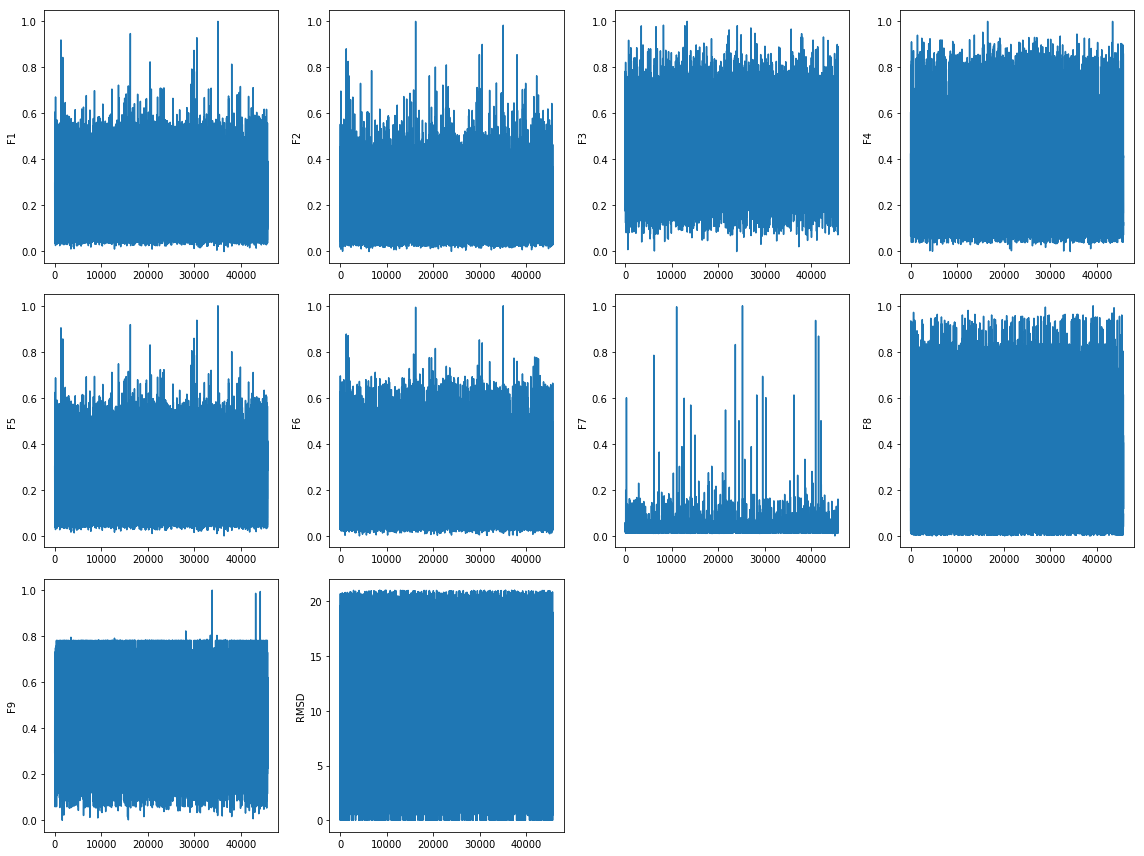

In [11]:
fig = plt.figure(figsize=(16,12))
plt.clf()
for i in range(10):
    plt.subplot(3, 4, i+1)
    plt.plot(df.iloc[:, i])
    plt.ylabel(df.columns.values[i])
fig.tight_layout()
#visualization of every column one by one

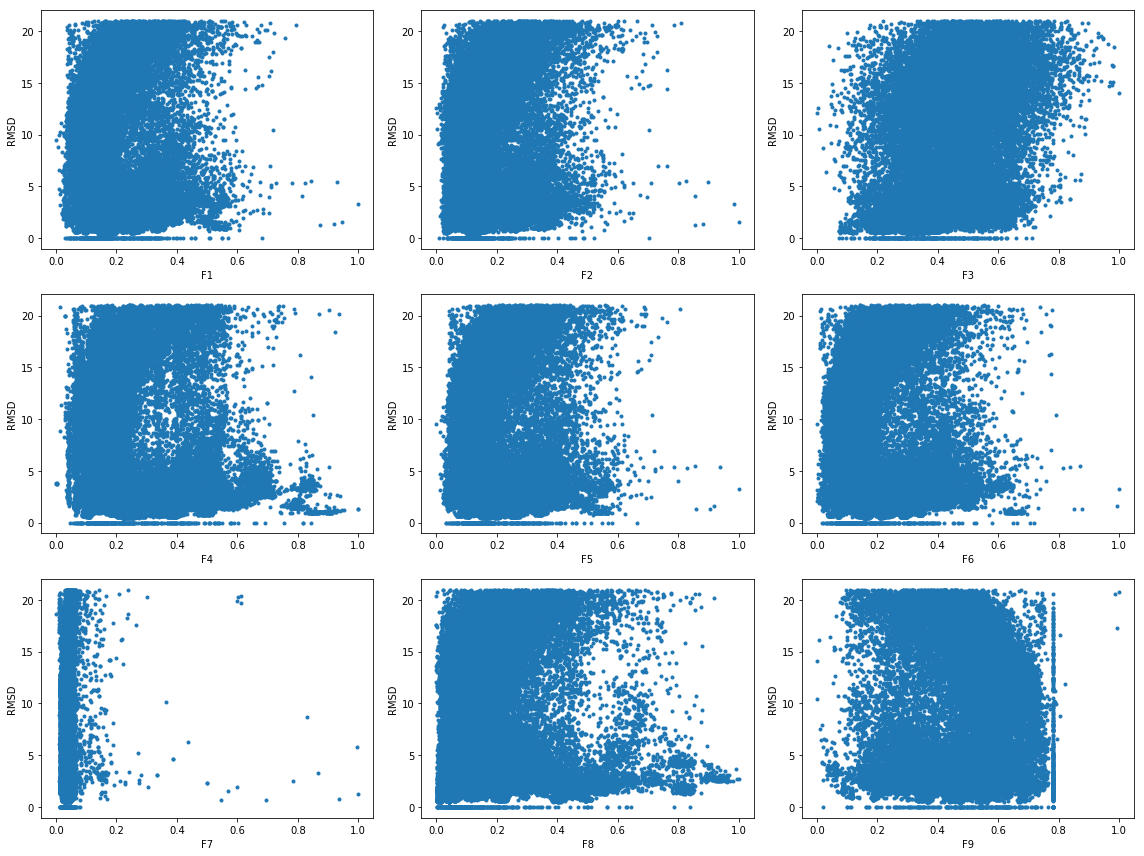

In [12]:
fig = plt.figure(figsize=(16,12))
plt.clf()
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.plot(df.iloc[:, i], df.loc[:,'RMSD'], '.')
    plt.xlabel(df.columns.values[i])
    plt.ylabel('RMSD')
fig.tight_layout()

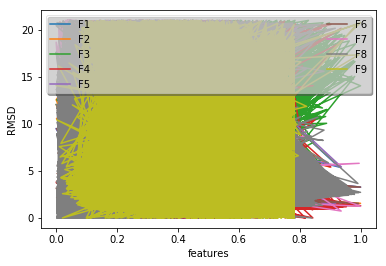

In [13]:
for i in range(9):
    plt.plot(df.iloc[:,i], df.loc[:,'RMSD'], label= list(df)[i])
    plt.xlabel('features')
    plt.ylabel('RMSD')
leg = plt.legend(loc='best', ncol=2, mode="expand", shadow=True, fancybox=True)
leg.get_frame().set_alpha(0.5)
                           

plt.show()

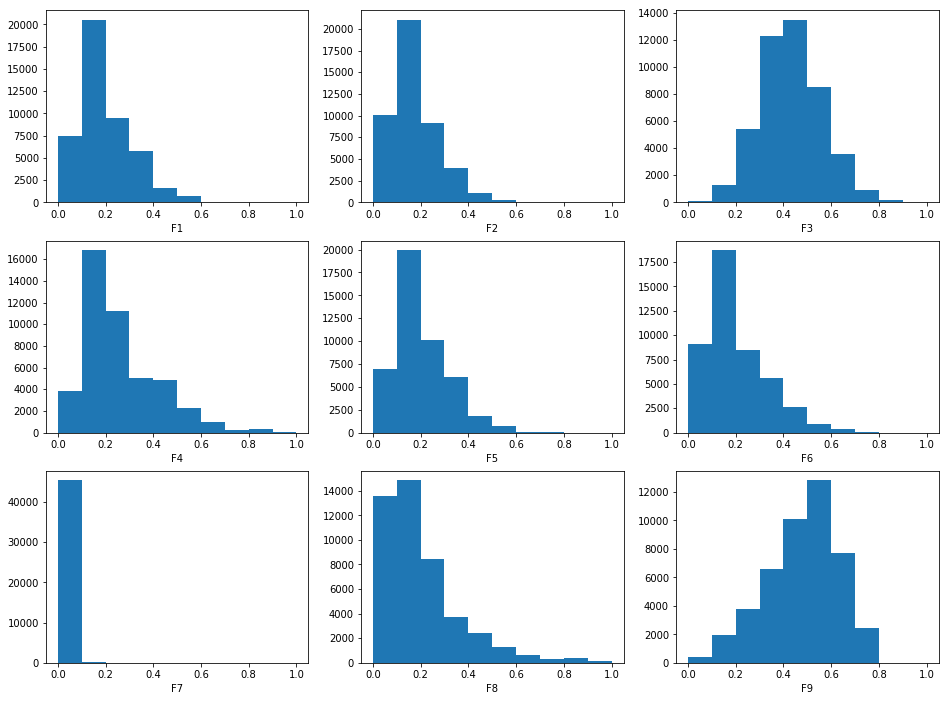

In [14]:
fig = plt.figure(figsize=(16,12))
plt.clf()
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.hist(df.iloc[:,i],10)
    plt.xlabel(df.columns.values[i])

## Preliminary observation of Data

* Data is clean and without repetition. Data does not have missing value or null value.
* There is not much to preprocess but data's featues are scattered and each features lies in different bounds. So, it is better to normalize the data. That's why I normalize the data between 0 to 1.
* We can say that F7 feature is useless.I am not dropping it right now instead first I will use LS amd LMS on this data and then drop F7. Afer that I am gonna compare the results. 

# III. Methods

## Neural Net

* It is method which try to replicate structure of human brain. We have three part in neural net, which are input values, hidden units(also hidden layer) and output values.
* Input values is our input data, we build neurons as much as our feature of data. We can use many hidden units as much as we want but for more neuron it will take time to compute. There is no perfect way to find, how much hidden layer and hidden units we can keep to get best result. We have to just find that by try and test method. 


<img src="http://webpages.uncc.edu/mlee173/teach/itcs6156/images/class/perceptron.png" width=600 />

* This as you can see in above figure is one precepton or we can say one neuron.  We pass the input and it got multiply with weight of unit and then we add all. After that we use activation function so our output will be in range. So, it will be easy to use gradient desent. There are lots of activation function, we choose according to our data and requirement. Now, going forward is called forward feed. We add bias value in every layer. We will get an output. Then, we will compare with original output and try to decrease the error using gradient desent. While this process we go from output to input and change weight of neuron to decrease the error. This updating weight and going backward to decrease error is called Backpropagation. We can use different kind of optimizer to implement graident desent. It is better to choose according to data values.

### Explantaion of code:

* We first take input values(no of feature), hidden units and oputput values as argument while intializeing the object. We first intialize all the parameters. Uisng our input we make the structure which has total layer as much as the number of argument we passed. Then we intialize wieght randomly between -0.1 to 0.1. Here, we use many function to implement the neural net as you can see. 
* Add ones is adding bias value in every layer. n_getlayer is just return the value of no of layer. Set_hunit update the weight every time backpropagation happens. Pack just make a single vector from the all layer units weight by stacking all in one vector. Unpack just do opposite. Cp_weight copy the weight. RBF is activation finction which we can use. In the field of mathematical modeling, a radial basis function network is an artificial neural network that uses radial basis functions as activation functions. The output of the network is a linear combination of radial basis functions of the inputs and neuron parameters. Radial basis function networks have many uses, including function approximation, time series prediction, classification, and system control. Here, we used tan(h) instead of RBF. Forward method is doing forward feed as I mention while saying about Neural net and backward method is doing backpropagation.Error is returning error just by computing difference between original value and predicated values. Train is main method which is training our,network with help of all above method. In trainnig, we are using scg optimizer. We can also use steepest optimizer. We can track the error after each iteration uisng ftrace. It is tracking the error. Train method will return the final weight and error after last backpropogation completed. Use method is taking test data and giving output using our neural net.



In [43]:
# standardization class
class Standardizer: 
    """ class version of standardization """
    def __init__(self, X, explore=False):
        self._mu = np.mean(X,0)  
        self._sigma = np.std(X,0)
        if explore:
            print ("mean: ", self._mu)
            print ("sigma: ", self._sigma)
            print ("min: ", np.min(X,0))
            print ("max: ", np.max(X,0))

    def set_sigma(self, s):
        self._sigma[:] = s

    def standardize(self,X):
        return (X - self._mu) / self._sigma 

    def unstandardize(self,X):
        return (X * self._sigma) + self._mu 
    

In [44]:
from grad import scg, steepest
from copy import copy

class NeuralNet:
    """ neural network class for regression
        
        Parameters
        ----------
        nunits: list
            the number of inputs, hidden units, and outputs

        Methods
        -------
        set_hunit    
            update/initiate weights
        

        pack 
            pack multiple weights of each layer into one vector

        forward
            forward processing of neural network

        backward
            back-propagation of neural network

        train
            train the neural network

        use
            appply the trained network for prediction

        Attributes
        ----------
        _nLayers
            the number of hidden unit layers 

        rho
            learning rate

        _W
            weights
        _weights
            weights in one dimension (_W is referencing _weight)

        stdX
            standardization class for data
        stdT
            standardization class for target

        Notes
        -----
        
    """

    def __init__(self, nunits):

        self._nLayers=len(nunits)-1
        self.rho = [1] * self._nLayers
        self._W = []
        wdims = []
        lenweights = 0
        for i in range(self._nLayers):
            nwr = nunits[i] + 1
            nwc = nunits[i+1]
            wdims.append((nwr, nwc))
            lenweights = lenweights + nwr * nwc

        self._weights = np.random.uniform(-0.1,0.1, lenweights) 
        start = 0  # fixed index error 20110107
        for i in range(self._nLayers):
            end = start + wdims[i][0] * wdims[i][1] 
            self._W.append(self._weights[start:end])
            self._W[i].resize(wdims[i])
            start = end

        self.stdX = None
        self.stdT = None
        self.stdTarget = True

    def add_ones(self, w):
        return np.hstack((np.ones((w.shape[0], 1)), w))

    def get_nlayers(self):
        return self._nLayers

    def set_hunit(self, w):
        for i in range(self._nLayers-1):
            if w[i].shape != self._W[i].shape:
                print("set_hunit: shapes do not match!")
                break
            else:
                self._W[i][:] = w[i][:]

    def pack(self, w):
        return np.hstack(map(np.ravel, w))

    def unpack(self, weights):
        self._weights[:] = weights[:]  # unpack

    def cp_weight(self):
        return copy(self._weights)

    def RBF(self, X, m=None,s=None):
        if m is None: m = np.mean(X)
        if s is None: s = 2 #np.std(X)
        r = 1. / (np.sqrt(2*np.pi)* s)  
        return r * np.exp(-(X - m) ** 2 / (2 * s ** 2))

    def forward(self,X):
        t = X 
        Z = []

        for i in range(self._nLayers):
            Z.append(t) 
            if i == self._nLayers - 1:
                t = np.dot(self.add_ones(t), self._W[i])
            else:
                t = np.tanh(np.dot(self.add_ones(t), self._W[i]))
                #t = self.RBF(np.dot(np.hstack((np.ones((t.shape[0],1)),t)),self._W[i]))
        return (t, Z)
        
    def backward(self, error, Z, T, lmb=0):
        delta = error
        N = T.size
        dws = []
        for i in range(self._nLayers - 1, -1, -1):
            rh = float(self.rho[i]) / N
            if i==0:
                lmbterm = 0
            else:
                lmbterm = lmb * np.vstack((np.zeros((1, self._W[i].shape[1])),
                            self._W[i][1:,]))
            dws.insert(0,(-rh * np.dot(self.add_ones(Z[i]).T, delta) + lmbterm))
            if i != 0:
                delta = np.dot(delta, self._W[i][1:, :].T) * (1 - Z[i]**2)
        return self.pack(dws)

    def _errorf(self, T, Y):
        return T - Y
        
    def _objectf(self, T, Y, wpenalty):
        return 0.5 * np.mean(np.square(T - Y)) + wpenalty

    def train(self, X, T, **params):

        verbose = params.pop('verbose', False)
        # training parameters
        _lambda = params.pop('Lambda', 0.)

        #parameters for scg
        niter = params.pop('niter', 1000)
        wprecision = params.pop('wprecision', 1e-10)
        fprecision = params.pop('fprecision', 1e-10)
        wtracep = params.pop('wtracep', False)
        ftracep = params.pop('ftracep', False)

        # optimization
        optim = params.pop('optim', 'scg')

        if self.stdX == None:
            explore = params.pop('explore', False)
            self.stdX = Standardizer(X, explore)
        Xs = self.stdX.standardize(X)
        if self.stdT == None and self.stdTarget:
            self.stdT = Standardizer(T)
            T = self.stdT.standardize(T)
        
        def gradientf(weights):
            self.unpack(weights)
            Y,Z = self.forward(Xs)
            error = self._errorf(T, Y)
            return self.backward(error, Z, T, _lambda)
            
        def optimtargetf(weights):
            """ optimization target function : MSE 
            """
            self.unpack(weights)
            #self._weights[:] = weights[:]  # unpack
            Y,_ = self.forward(Xs)
            Wnb=np.array([])
            for i in range(self._nLayers):
                if len(Wnb)==0: Wnb=self._W[i][1:,].reshape(self._W[i].size-self._W[i][0,].size,1)
                else: Wnb = np.vstack((Wnb,self._W[i][1:,].reshape(self._W[i].size-self._W[i][0,].size,1)))
            wpenalty = _lambda * np.dot(Wnb.flat ,Wnb.flat)
            return self._objectf(T, Y, wpenalty)

        if optim == 'scg':
            result = scg(self.cp_weight(), gradientf, optimtargetf,
                                        wPrecision=wprecision, fPrecision=fprecision, 
                                        nIterations=niter,
                                        wtracep=wtracep, ftracep=ftracep,
                                        verbose=False)
            self.unpack(result['w'][:])
            self.f = result['f']
        elif optim == 'steepest':
            result = steepest(self.cp_weight(), gradientf, optimtargetf,
                                nIterations=niter,
                                xPrecision=wprecision, fPrecision=fprecision,
                                xtracep=wtracep, ftracep=ftracep )
            self.unpack(result['w'][:])
        if ftracep:
            self.ftrace = result['ftrace']
        if 'reason' in result.keys() and verbose:
            print(result['reason'])

        return result

    def use(self, X, retZ=False):
        if self.stdX:
            Xs = self.stdX.standardize(X)
        else:
            Xs = X
        Y, Z = self.forward(Xs)
        if self.stdT is not None:
            Y = self.stdT.unstandardize(Y)
        if retZ:
            return Y, Z
        return Y

## K-fold cross validation 

* Acuuracy of model and tuning parameter is very key in machine learning. It is very important to make sure that our model is not overfitting or underfitting. There is very huge possiblity while we use train-test split method to make our model. So, we can use k-fold cross validation to get accurate accuracy of the model. Also we can use it for finding correct parameter for our model.Idea is pretty simple. We first divide the data in k part. Then we choose one part for validation , one part for testing and remaining for training.We train the model using training data then test on validation data and find the best model for different lamda value. At last we test this on test data.Every time we change validation data for fix test data. We train that data on different lamda value and pick the best with less error.It is very big process with lots of computation. But it will safe from underfitting and overfitting. When accuracy and tuning parameter is very important, this method is worth it.

### Explanation of Code

* Fisrt, I make two method. One is to find root mean square value and another one is to remove the particular arry from the list. Then, I made function called kcv to do k-fold cross validation. Here, I take k (no of part eant to make of data) as parameter. I take 4 lamda values. First I intialize the lamda and testerror list. Then I devide my data in k+1 part. Now last one part, I assign for testing data only and remove that from my data. 
* Now, I take differnt validation data for k time and train my data on remaining part with differnt lamda value and append the error in result list. I take lamda using which I get minimum error. At last I append that lamda and error which I get on my test data in my testerror list. For every validation data, I get one best lamda. I will have k element in my list. 


In [73]:
from copy import copy
def rmse(T, Y):
    return np.sqrt((np.sum((T-Y)**2))/len(T))
def removearray(L,arr):
    ind = 0
    size = len(L)
    while ind != size and not np.array_equal(L[ind],arr):
        ind += 1
    if ind != size:
        L.pop(ind)
    else:
        raise "Error"
def kcv(k):
    lam = [0.01, 0.1, 1, 10] 
    TestError = []
    data = np.array_split(df.drop(columns=['F7']).values,k+1)
#     data = [list(d) for d in data]
    test_data = data[k]
#     print(len(test_data),len())
    removearray(data,test_data)
    for i in range(0,k):
        result = []
        validation_data = data[i]
        cdata = copy(data)
#        print(len(cdata))
        removearray(cdata,validation_data)
#        print(len(cdata))
        train_data = np.concatenate(cdata)
#         print(train_data[0])
#         print(len(train_data))
        X = [x[:-1] for x in train_data]
        T = [x[-1] for x in train_data]
        T = np.array(T).reshape((len(T),1))
#         print(validation_data[0],X[1],T[0])
        for j in range(len(lam)):
            nn = NeuralNet([8,50,50,1])
            nn.train(X,T,Lambda = lam[j],niter = 500)
            y = nn.use([x[:-1] for x in validation_data])
            tcv = [x[-1] for x in validation_data]
            tcv = np.array(tcv).reshape((len(tcv),1))
            result.append(rmse(tcv,y))
        index = np.argmin(result)
        nn = NeuralNet([8,50,50,1])
        nn.train(X,T,Lambda = lam[index],niter = 500)
        y = nn.use([x[:-1] for x in test_data])
        t = [x[-1] for x in test_data]
        t = np.array(t).reshape((len(t),1))
        TestError.append((lam[index],rmse(t,y)))
        del cdata
        del nn
    
    return TestError

#Here, I am taking fix test data and will test my model on that only. 

In [ ]:
print(kcv(5))

# IV - Results

### Train and Test with different hidden units

In [ ]:
NN2 = NeuralNet([8,250,1])
X = df.loc[:,[col for col in df.columns if col not in ['RMSD', 'F7']]]
T = df.loc[:,'RMSD'].values.reshape((X.shape[0],1))
result = NN2.train(X,T,lamda = 0.01,ftracep=True)

Rmse error is: 4.434042245132685


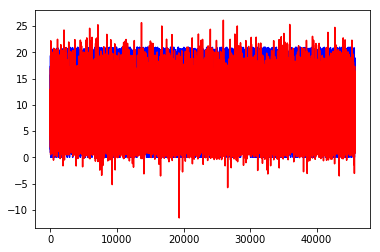

In [58]:
Y2 = NN2.use(X)

def rmse(T, Y):
    return np.sqrt((np.sum((T-Y)**2))/len(T))
print("Rmse error is:",rmse(T,Y2))
plt.plot(T,'b')
plt.plot(Y2,'r')

In [45]:
def rmse(T, Y):
    return np.sqrt((np.sum((T-Y)**2))/len(T))

In [70]:
NN1 = NeuralNet([8,100,1])
X = df.loc[:,[col for col in df.columns if col not in ['RMSD', 'F7']]]
T = df.loc[:,'RMSD'].values.reshape((X.shape[0],1))
result1 = NN1.train(X,T,lamda = 0.01,ftracep=True)

Rmse error is: 4.289528661174267


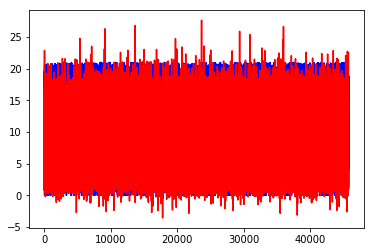

In [72]:
Y1 = NN1.use(X)
print("Rmse error is:",rmse(T,Y1))
plt.plot(T,'b')
plt.plot(Y1,'r')

In [ ]:
NN = NeuralNet([8,500,1])
X = df.loc[:,[col for col in df.columns if col not in ['RMSD', 'F7']]]
T = df.loc[:,'RMSD'].values.reshape((X.shape[0],1))
result = NN.train(X,T,lamda = 0.01,ftracep=True)

In [ ]:
Y = NN.use(X)
print("Rmse error is:",rmse(T,Y))
plt.plot(T,'b')
plt.plot(Y,'r')

In [62]:
NN3 = NeuralNet([8,16,1])
X = df.loc[:,[col for col in df.columns if col not in ['RMSD', 'F7']]]
T = df.loc[:,'RMSD'].values.reshape((X.shape[0],1))
result3 = NN3.train(X,T,lamda = 0.01,ftracep=True)

Rmse error is: 4.517214679857148


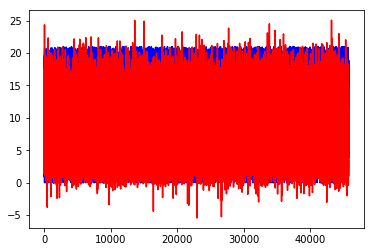

In [65]:
Y3 = NN3.use(X)
print("Rmse error is:",rmse(T,Y3))
plt.plot(T,'b')
plt.plot(Y3,'r')

In [51]:
NN4 = NeuralNet([8,50,50,1])
X = df.loc[:,[col for col in df.columns if col not in ['RMSD', 'F7']]]
T = df.loc[:,'RMSD'].values.reshape((X.shape[0],1))
result4 = NN4.train(X,T,lamda = 0.01,ftracep=True)

Rmse error is: 3.9063668683276136


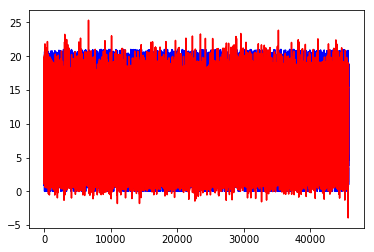

In [53]:
Y4 = NN4.use(X)
print("Rmse error is:",rmse(T,Y4))
plt.plot(T,'b')
plt.plot(Y4,'r')

In [54]:
print(result4)

{'w': array([-0.4525226 , -0.07884304,  0.60927379, ..., -0.02007178,
        0.42788772, -0.29812793]), 'f': 0.20382730556263623, 'reason': 'reached limit of nIterations', 'wtrace': None, 'ftrace': [0.4938156100762632, 0.43753469012316726, 0.43743514912740816, 0.40006148510645384, 0.39368177818146427, 0.3872876356578037, 0.38099968208543283, 0.3666208362373692, 0.36271461718605, 0.3582880035292999, 0.3565047351794097, 0.3560590612122136, 0.3554057674861223, 0.35511301503846254, 0.35474804881004696, 0.3542658753718093, 0.35290047682047604, 0.35246479307713247, 0.35100131052871963, 0.35030720586762565, 0.35008327248269144, 0.3492565792687509, 0.3491012942636785, 0.34829893636136944, 0.3478693282968213, 0.34739571724521134, 0.3465175606502612, 0.3460578777381903, 0.3455639313976308, 0.34480179464620053, 0.344570992043708, 0.3432277479290752, 0.3420654922649036, 0.34178657403863827, 0.34151016129457024, 0.3412135731137271, 0.3406192088312235, 0.339851924545055, 0.3386717289351492, 0.33826

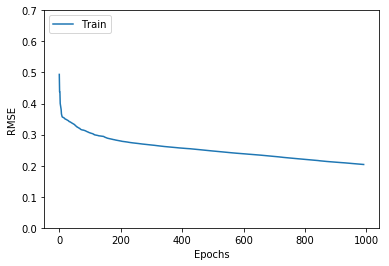

In [56]:
plt.plot(NN4.ftrace)
plt.ylim(0,0.7)
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend(('Train','Test'),loc='upper left')

#### Discussions about parameter/network structure choice:

* By comparing the rmse value of all the differnt object, I found the best among all, which has 2 hidden layer of 50 neuron and lamda value equal to 0.01. By giving different hidden units, I realise that if you put less hidden units then model cannot learn that good. Also , If you put more hideen unit and iteration then sometimes it doesnot helpful. It only take more time in computation. Result will be same because after some point it converge to optimal value. It decrease very less aprrox to zero. 
* It is good to increase the layer but then it will increase the computation dramastically. It will beacome kind of deeo network. There is no method to find perfect hidden units, we have to just play with different values.
* Lamda, we choose after seeing the testerror list after calling kvc function. As you can see every case we are getting best result at 0.01 lamda value.
* From result we can say that there are some weight with negative value also and reason of stoppig is because of iterartion over. From the plot, you can see that how our error is reaching to minimum after each iteration. First it decrease dramastically and after some iteration it doesnot change much. It is reaching to optimal very slowly. So, there is no need to incrase the iteration.  


## Compare Neural Net with Least Square regression Model 

In [40]:
import numpy as np 
from abc import ABC, abstractmethod

# Super class for machine learning models 

class BaseModel(ABC):
    """ Super class for ITCS Machine Learning Class"""
    
    @abstractmethod
    def train(self, X, T):
        pass

    @abstractmethod
    def use(self, X):
        pass

    
class LinearModel(BaseModel):
    """
        Abstract class for a linear model 
        
        Attributes
        ==========
        w       ndarray
                weight vector/matrix
    """

    def __init__(self):
        """
            weight vector w is initialized as None
        """
        self.w = None

    def _check_matrix(self, mat, name):
        if len(mat.shape) != 2:
            raise ValueError(''.join(["Wrong matrix ", name]))
        
    # add a basis
    def add_ones(self, X):
        """
            add a column basis to X input matrix
        """
        self._check_matrix(X, 'X')
        return np.hstack((np.ones((X.shape[0], 1)), X))

    ####################################################
    #### abstract funcitons ############################
    @abstractmethod
    def train(self, X, T):
        """
            train linear model
            
            parameters
            -----------
            X     2d array
                  input data
            T     2d array
                  target labels
        """        
        pass
    
    @abstractmethod
    def use(self, X):
        """
            apply the learned model to input X
            
            parameters
            ----------
            X     2d array
                  input data
            
        """        
        pass 

In [41]:
class LinearRegress(LinearModel): 
    """ 
        LinearRegress class 
        
        attributes
        ===========
        w    nd.array  (column vector/matrix)
             weights
    """
    def __init__(self):
        LinearModel.__init__(self)
        
    # train lease-squares model
    def train(self, X, T):
        X1 = super().add_ones(X)
        self.w = np.linalg.inv(X1.T @ X1) @ X1.T @ T 
        
    
    # apply the learned model to data X
    def use(self, X):
        X1 = super().add_ones(X)
        return X1@(self.w)

In [50]:
LS = LinearRegress()
X = df.loc[:,[col for col in df.columns if col not in ['RMSD','F7']]]
T = df.loc[:,'RMSD'].values.reshape((X.shape[0],1))
LS.train(X,T)
Y = LS.use(X)
print('LS rmse error:', rmse(T,Y))
print("Neural Net rmse error is:",rmse(T,NN4.use(X)))

LS rmse error: 5.188142492630707
Neural Net rmse error is: 3.8291895534443183


* So, from upper result we can easily say that neural net is better regression model than compare to least square method. But LS has their own pros like it will take much less time to train. Meomery consumption will be same but if we use LMS instead of LS then we again get big difference.

#### Plot

In [ ]:
X = df.loc[:,[col for col in df.columns if col not in ['RMSD','F7']]]
T = df.loc[:,'RMSD'].values.reshape((X.shape[0],1))

from sklearn.model_selection import train_test_split
X_train, X_test, T_train, T_test = train_test_split(X, T, test_size=0.33, random_state=42)

nnf = NeuralNet([8,50,1])
nnf.train(X_train, T_train, ftracep=True, niter = 500 ) 
Y,Z = nnf.use(X_test, retZ=True)

Text(0, 0.5, 'Actual and Predicted $f(x)$')

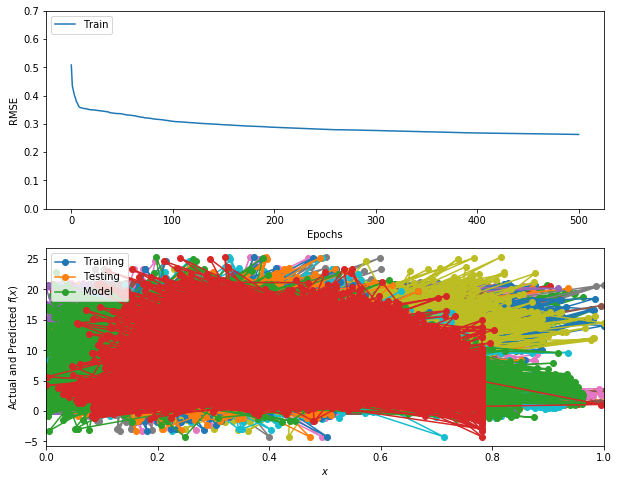

In [76]:
plt.figure(figsize=(10,8))
plt.subplot(2,1,1)
plt.plot(nnf.ftrace)
plt.ylim(0,0.7)
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend(('Train','Test'),loc='upper left')

plt.subplot(2,1,2)
plt.plot(X_train,T_train,'o-',X_test,T_test,'o-',X_test,Y,'o-')
plt.xlim(0,1)
plt.legend(('Training','Testing','Model'),loc='upper left')
plt.xlabel('$x$')
plt.ylabel('Actual and Predicted $f(x)$')


### Discussion about the prediction results. Try to analyze what nonlinear regression model learned.	

* So by seeing the result, we can say that neuron weight is mostly between -0.5 to 0.5 and it is predicating very well for every kind of input values. 
* While using Neural net the most difficult things are to find how many hidden unit to use and to avoid graident exploide. From the result and ftrace, I can say that it is near by global minimum and it didont suffer with gradient explosion. For that, activation function is very key factor. We have to choose the activation function according to our data vale and the type of data(regression or classification). Because of forward feed and backpropogation after every iteration, weight are getting updated accordingly to get minimum error and we will reach local minimum. This is the whole concept of gradient desent. First weight are getting updated with big margin and after some iteration it start to converge means there is no much variation. 

# Conclusions

* I learn about neural net and how non linear neural net works. What is happening in gradient desent, backpropogation and forward feed. 
* I learn about different optimizer which we can use to implement gradient desent. I also learn about different activation function and when to use which activation function. 
* After implementing neural net, I learnt about k-fold cross validation. I get to know how it helps to tune parameter and how it help to overcome on overfitting and underfitting. I implement k-fold cross validation using my logic.
* I train and test my model using different hidden layer and hidden units. I compare all and learn how to find best values for hidden layer and hidden units. I also compare it with regression method. Neural network is better than least square regression method for my data.
* I also make three differnet deep network using keras. 

# Extra Credit

One extra credit is assigned when finish the following bullets. 

- Finish the following nonlinear logistic regression class and apply to your classification data. 
- Use cross validation to discover the best model. 

In [ ]:
from nn import NeuralNet

class NeuralNetLogReg(NeuralNet):
    """ Nonlinear Logistic Regression
    """

    # if you think, you need additional items to initialize here,
    # add your code for it here
    def __init__(self, nunits):
        pass

    # Looking at the final summary or comparison table in lecture note,
    # add your codes for forward pass for logistic regression
    def forward(self, X):
        pass

    # This is the error function that we want to minimize
    # what was it? take a look at the lecture note to fill in
    def _objectf(self, T, Y, wpenalty):
        pass

    # you must reuse the NeuralNet train since you already modified
    # the objective or error function (maybe both), 
    # you do not have many to change here.
    # MAKE SURE convert a vector label T to indicator matrix and 
    # feed that for training
    def train(self, X, T, **params):
        pass

    # going through forward pass, you will have the probabilities for each label
    # now, you can use argmax to find class labels
    # return both label and probabilities        
    def use(self, X):
        pass


# Deep Learning (2 Extra Credits)


For A5 extra credits, you build a deep network with more than 5 layers using TensorFlow. 
Main task for this work is converting your neural network codes with TensorFlow and searching for good structures that works well for your data. 
This includes following tasks.

- Pick at least 3 different networks for experiments.
- Summarize the choice of your networks. 
- Explain your TensorFlow codes. 
- Explain how you apply your model to your data. 
- Results
  - Presents the results of applications of your deep networks.
  - Visualize the results 
  - Discuss about the choice of network structures and performance of it as you change the structures.  
  - What do you think about the results? 


In [2]:
from keras.models import Sequential
from keras.layers import Dense
import numpy
numpy.random.seed(7)

Using TensorFlow backend.


#### Network 1

In [ ]:
X = df.loc[:,[col for col in df.columns if col not in ['RMSD','F7']]]
T = df.loc[:,'RMSD'].values.reshape((X.shape[0],1))

model = Sequential()
model.add(Dense(8, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='linear'))

In [ ]:
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X,T, epochs=150, batch_size=200)

In [ ]:
print('rmse accuracy',rmse(T,model.predict(X)))

#### Network 2

In [77]:
X = df.loc[:,[col for col in df.columns if col not in ['RMSD','F7']]]
T = df.loc[:,'RMSD'].values.reshape((X.shape[0],1))

model1 = Sequential()
model1.add(Dense(16, input_dim=8, activation='relu'))
model1.add(Dense(8, activation='relu'))
model1.add(Dense(4, activation='relu'))
model1.add(Dense(2, activation='relu'))
model1.add(Dense(1, activation='linear'))

In [78]:
model1.compile(loss='mean_squared_error', optimizer='adam')
model1.fit(X,T, epochs=200, batch_size=50)

Epoch 1/200
45730/45730 [==============================] - 4s 85us/step - loss: 41.7208
Epoch 2/200
45730/45730 [==============================] - 3s 69us/step - loss: 28.6147
Epoch 3/200
45730/45730 [==============================] - 3s 66us/step - loss: 27.0443
Epoch 4/200
45730/45730 [==============================] - 3s 66us/step - loss: 26.4956
Epoch 5/200
45730/45730 [==============================] - 3s 66us/step - loss: 26.1629
Epoch 6/200
45730/45730 [==============================] - 3s 69us/step - loss: 25.9266
Epoch 7/200
45730/45730 [==============================] - 3s 65us/step - loss: 25.7730
Epoch 8/200
45730/45730 [==============================] - 3s 64us/step - loss: 25.6297
Epoch 9/200
45730/45730 [==============================] - 3s 66us/step - loss: 25.5582
Epoch 10/200
45730/45730 [==============================] - 3s 68us/step - loss: 25.5357
Epoch 11/200
45730/45730 [==============================] - 3s 71us/step - loss: 25.4589
Epoch 12/200
45730/45730 [====

KeyboardInterrupt: 

In [34]:
print('rmse accuracy',rmse(T,model1.predict(X)))

rmse accuracy 4.6819621308694


#### Network 3

In [ ]:
X = df.loc[:,[col for col in df.columns if col not in ['RMSD','F7']]]
T = df.loc[:,'RMSD'].values.reshape((X.shape[0],1))

model2 = Sequential()
model2.add(Dense(50, input_dim=8, activation='relu'))
model2.add(Dense(25, activation='relu'))
model2.add(Dense(50, activation='relu'))
model2.add(Dense(1, activation='linear'))

In [ ]:
model2.compile(loss='mean_squared_error', optimizer='adam')
model2.fit(X,T, epochs=300, batch_size=100)

In [ ]:
print('rmse accuracy',rmse(T,model2.predict(X)))

#### Summarize the choice of your networks.
* I choose three differnt network with different hidden layers, hidden units and activation function. Also I used different epoch(iteration) and batch size(it will calculate error for time of batch size doing forward feed and then it will take average of error and do backpropogation.). In first network, I used 5 hidden layer which all contains 8 neuron. I used relu activation function for hidden layer and for output I used activation function. In second network, I used 4 hidden layer with 16,8,4,2 hidden units respectively. I also used relu for hidden unit and for output I used linear activation function. The last one has only three hidden layer with 50,25,20 neuron.     
####  Explain your TensorFlow codes. 
* Load Data: First I load my data.
* Define Model: Models in Keras are defined as a sequence of layers.We create a Sequential model and add layers one at a time until we are happy with our network topology. Here I am adding every layer using add method and dense is for making network fully connected. Now, input dim is where we have to give number of input that we want to take. So, it is assign in first one only. Last parameter is activation function.
* Compile Model : Now, model is ready to compile. ompiling the model uses the efficient numerical libraries under the covers (the so-called backend) such as Theano or TensorFlow. Here as parameter we are giving loss and optimizer we want to usse. Loss will print what error you want to print after every iteration. I give mean square error as you can see.
* fit model: We can train or fit our model on our loaded data by calling the fit() function on the model. I am giving number of iteration and batch size while fitting my data to the model. 
#### Explain how you apply your model to your data. 
* I just give my input value and ouptput vale duting fitting my model.


#### Presents the results of applications of your deep networks.

In [75]:
print('network1 rmse accuracy',rmse(T,model.predict(X)))
print('network2 rmse accuracy',rmse(T,model1.predict(X)))
print('network3 rmse accuracy',rmse(T,model2.predict(X)))

network1 rmse accuracy 9.109091893039178
network2 rmse accuracy 4.6819621308694
network3 rmse accuracy 9.109091893039178


#### Visualize the results

In [ ]:
plt.figure(figsize=(10,8))
plt.subplot(3,1,1)
plt.plot(T,'b')
plt.plot(model.predict(X),'r')
plt.subplot(3,1,2)
plt.plot(T,'b')
plt.plot(model1.predict(X),'r')
plt.subplot(3,1,3)
plt.plot(T,'b')
plt.plot(model2.predict(X),'r')

#### Discuss about the choice of network structures and performance of it as you change the structures.
* It is hard to figure out which is best suited for the data. We have to do try and error only. There is no method to find best structure for the given data.

#### What do you think about the results?

* Given result is very good. We can decrease the error more by giving more epochs but I dont have time so I didnot use higher iteration value. I think we will get best solution using this and it will take less time copare to neural net because we are using tensorflow.The backend automatically chooses the best way to represent the network for training and making predictions to run on your hardware, such as CPU or GPU or even distributed. 

## Grading

DO NOT forget to submit your data! Your notebook is supposed to run fine after running your codes. 


points |-- | description
--|--|:--
5 | Overview| states the objective and the appraoch 
10 | Data | 
 | 2| Includes description of your data
 | 3| Plots to visualize data 
 | 5| Reading and analyzing the plots 
45 | Methods | 
 |10| Summary of Neural Networks
 | 5| Explanation of codes
 |10| Examination of correct implementation with preliminary test with *explanation (5 pts)*
 |20| Cross validation codes and explanation 
35 | Results | Your Data
| 10| plots for results
| 15| Discussions about parameter/network structure choice 
| 10| Discussion about the prediction results. Try to analyze what nonlinear regression model learned. 
5 | Conclusions 
